In [124]:
import pandas as pd

In [125]:
tweets_path = "../../Kishen_Tiffany/final_5000_all_features.csv"
# data preparation
tweets = pd.read_csv(tweets_path)
relTweets = tweets[tweets.relevant == 1].reset_index(drop=True) #2736

In [132]:
relTweets_2013_2017 = relTweets[(relTweets.year >= 2013) & (relTweets.year <= 2017)]
relTweets_2018_2022 = relTweets[(relTweets.year > 2017)]

In [135]:
for df, tag in zip([relTweets_2013_2017, relTweets_2018_2022], ['2013_2017', '2018_2022']):
    print(len(df), tag)

1163 2013_2017
1573 2018_2022


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
plt.style.use('ggplot')

In [103]:
adj_mat = np.loadtxt('../model_input_data/doc_doc_adjacency_matrix.txt')
act_mat = np.loadtxt('../model_input_data/doc_doc_act.txt')
po_mat = np.loadtxt('../model_input_data/doc_doc_po.txt')
t_count = np.loadtxt('../model_input_data/doc_doc_t_count.txt')
t_tfidf = np.loadtxt('../model_input_data/doc_doc_t_tfidf.txt')
t_jaccard = np.loadtxt('../model_input_data/doc_doc_t_jaccard.txt')

In [104]:
sim_count = np.loadtxt('../model_input_data/doc_doc_sim_count.txt')
sim_tfidf = np.loadtxt('../model_input_data/doc_doc_sim_tfidf.txt')
sim_jaccard = np.loadtxt('../model_input_data/doc_doc_sim_jaccard.txt')

In [136]:
sim_count_1317 = np.loadtxt('../model_input_data/doc_doc_sim_count_2013_2017.txt')
sim_count_1822 = np.loadtxt('../model_input_data/doc_doc_sim_count_2018_2022.txt')

In [137]:
# def sigmoid_transform(arr, scale=1.0):
#     """
#     Apply a sigmoid transformation to a 2D array of values, leaving 0 values unchanged.
    
#     Parameters:
#     - arr: A 2D NumPy array
#     - scale: A scaling factor for the sigmoid function (default is 1.0).
    
#     Returns:
#     - The transformed 2D array with 0 values unchanged.
#     """
#     # Create a copy of the input array to store the transformed values
#     transformed_arr = arr.copy()
    
#     # Apply the sigmoid transformation to non-zero values
#     non_zero_indices = arr != 0
#     transformed_arr[non_zero_indices] = 1 / (1 + np.exp(-arr[non_zero_indices] * scale))
    
#     return transformed_arr

def create_heatmap(dis, cmap = "YlGnBu"):
  fig, ax = plt.subplots(figsize=(18,18))
  sns.heatmap(dis, cmap=cmap,  vmin=0, vmax=np.max(dis))
#   fig.suptitle(f"{sim_type} Similarity")

def get_stats(adj, thres):
    print("> {}: {}({:.3f})".format(thres, np.count_nonzero(adj > thres), np.count_nonzero(adj > thres)/(adj.shape[0]*adj.shape[1])))
    print("<= {}: {}({:.3f})".format(thres, np.count_nonzero(adj <= thres), np.count_nonzero(adj <= thres)/(adj.shape[0]*adj.shape[1])))

In [4]:
get_stats(adj_mat, 0)

> 0: 6698680(0.89)
<= 0: 787016(0.11)


In [57]:
get_stats(act_mat, 0)

> 0: 0(0.00)
<= 0: 7485696(1.00)


In [58]:
get_stats(po_mat, 0)

> 0: 1594(0.00)
<= 0: 7484102(1.00)


In [123]:
get_stats(sim_count, 0)

> 0: 6698680(0.895)
<= 0: 787016(0.105)


In [147]:
get_stats(sim_count_1317, 0.55)
get_stats(sim_count_1822, 0.55)

> 0.55: 284512(0.210)
<= 0.55: 1068057(0.790)
> 0.55: 246058(0.099)
<= 0.55: 2228271(0.901)


#### finding the cut-off for adjacency matrix

In [11]:
jac_num_list = []
jac_perc_list = []
tfidf_num_list = []
tfidf_perc_list = []
count_num_list = []
count_perc_list = []

for n in np.arange(0.0, 1, 0.01):
    jac_num_list.append(np.count_nonzero(sim_jaccard > n))
    jac_perc_list.append((np.count_nonzero(sim_jaccard > n)/(sim_jaccard.shape[0]*sim_jaccard.shape[1]))*100)
    tfidf_num_list.append(np.count_nonzero(sim_tfidf > n))
    tfidf_perc_list.append((np.count_nonzero(sim_tfidf > n)/(sim_tfidf.shape[0]*sim_tfidf.shape[1]))*100)
    count_num_list.append(np.count_nonzero(sim_count > n))
    count_perc_list.append((np.count_nonzero(sim_count > n)/(sim_count.shape[0]*sim_count.shape[1]))*100)

In [50]:
data = {
    'adjacency matrix cut-off': list(np.arange(0.0, 1, 0.01)), 
    'jaccard_count': jac_num_list,
    'jaccard_percent': jac_perc_list,
    'tfidf_cosine_count': tfidf_num_list,
    'tfidf_cosine_percent': tfidf_perc_list,
    'count_cosine_count': count_num_list,
    'count_cosine_percent': count_perc_list,
}

cutoff_summary = pd.DataFrame(data)

In [114]:
cutoff_summary.to_csv('adjacency_matrix_cutoff_summary.csv')

In [106]:
# percentage table
data = {
    'adjacency matrix cut-off': list(np.arange(0.0, 1, 0.01)), 
    'jaccard': jac_perc_list,
    'cosine_tfidf': tfidf_perc_list,
    'cosine_count': count_perc_list,
}

cutoff_df_percent = pd.DataFrame(data)

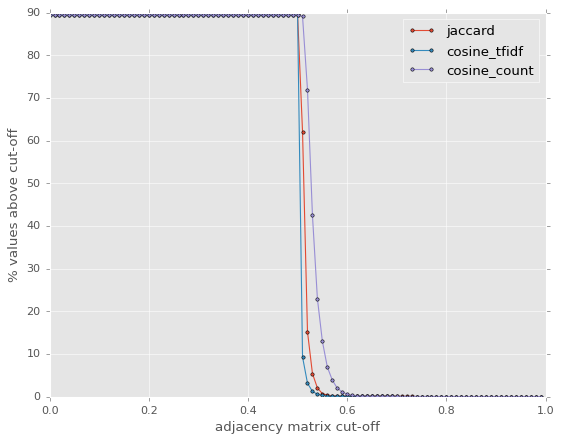

In [107]:
# Plot all columns using 'adjacency matrix cut-off' as x
x = cutoff_df_percent['adjacency matrix cut-off']

# Get a list of column names for plotting
y_columns = cutoff_df_percent.columns[1:]

plt.figure(figsize=(8, 6))
# Create line plots for each column
for column in y_columns:
    y = cutoff_df_percent[column]
    plt.plot(x, y, label=column, marker='o', markersize=3)

# Add labels and legend
plt.xlabel('adjacency matrix cut-off', fontsize=12)
plt.ylabel('% values above cut-off',fontsize=12)
# plt.title('Adjacency Matrix Cut-off Curves',fontsize=12)
plt.xlim(0,1)
# plt.ylim(0,100)
plt.legend()
# Show the plot
plt.show()

In [134]:
get_stats(sim_jaccard, 0.53)

> 0.53: 402954(0.05)
<= 0.53: 7082742(0.95)


In [99]:
get_stats(sim_count, 0.52)

> 0.52: 5384782(0.72)
<= 0.52: 2100914(0.28)


In [122]:
get_stats(sim_tfidf, 0.56)

> 0.56: 10634(0.00)
<= 0.56: 7475062(1.00)


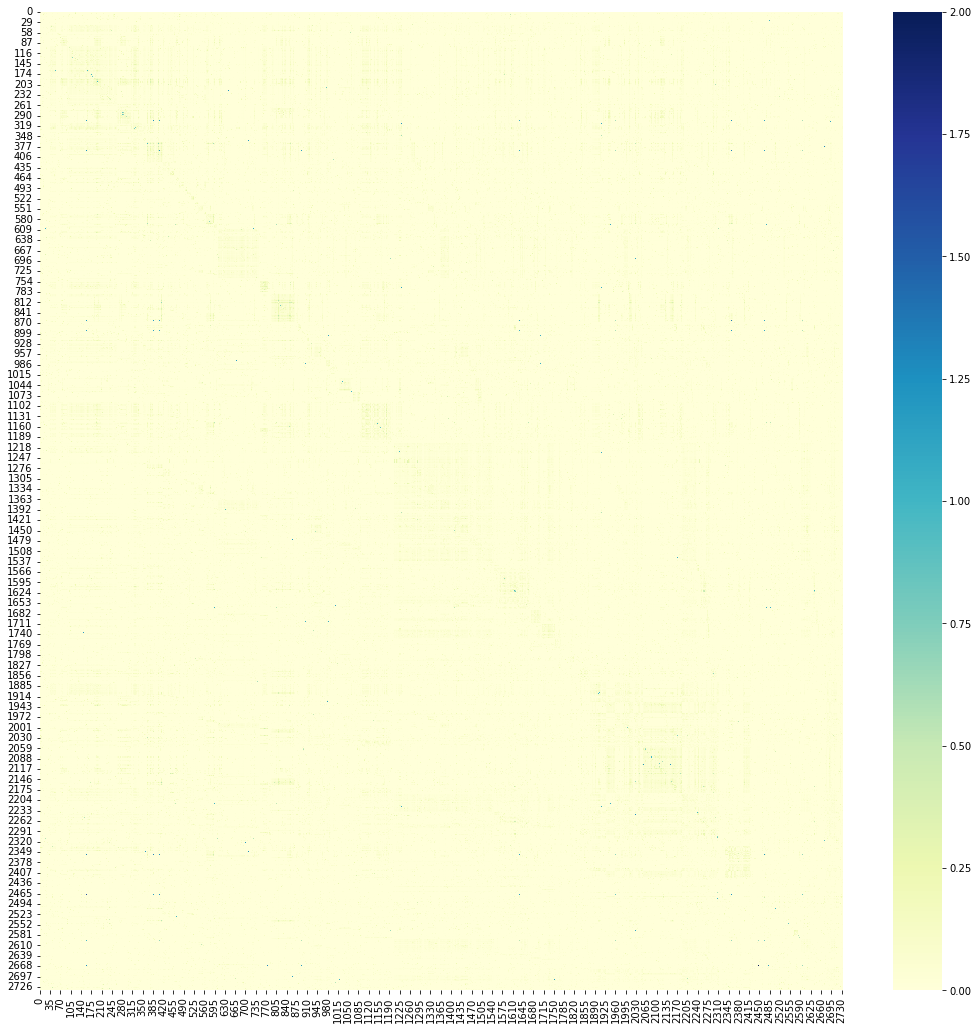

In [82]:
create_heatmap(sim_tfidf_raw)

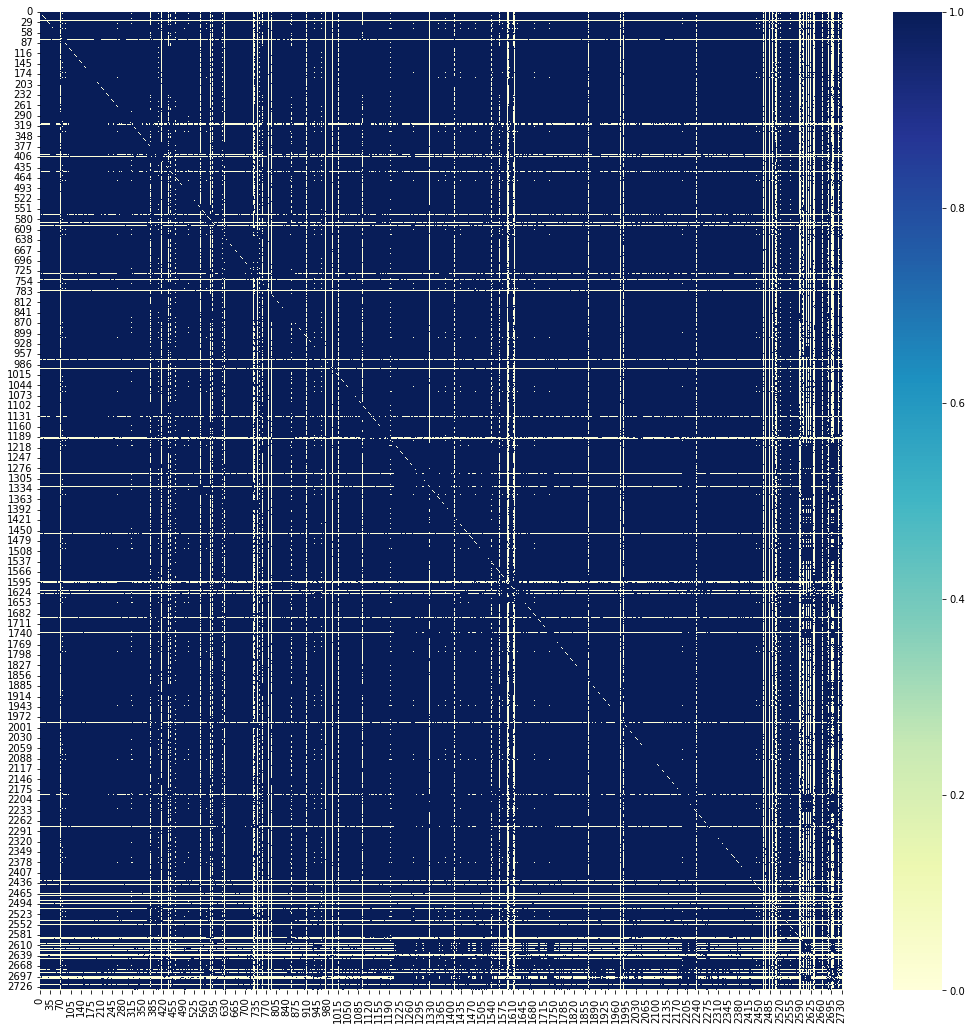

In [14]:
create_heatmap(np.loadtxt('../model_input_data/doc_doc_adjacency_matrix.txt'))

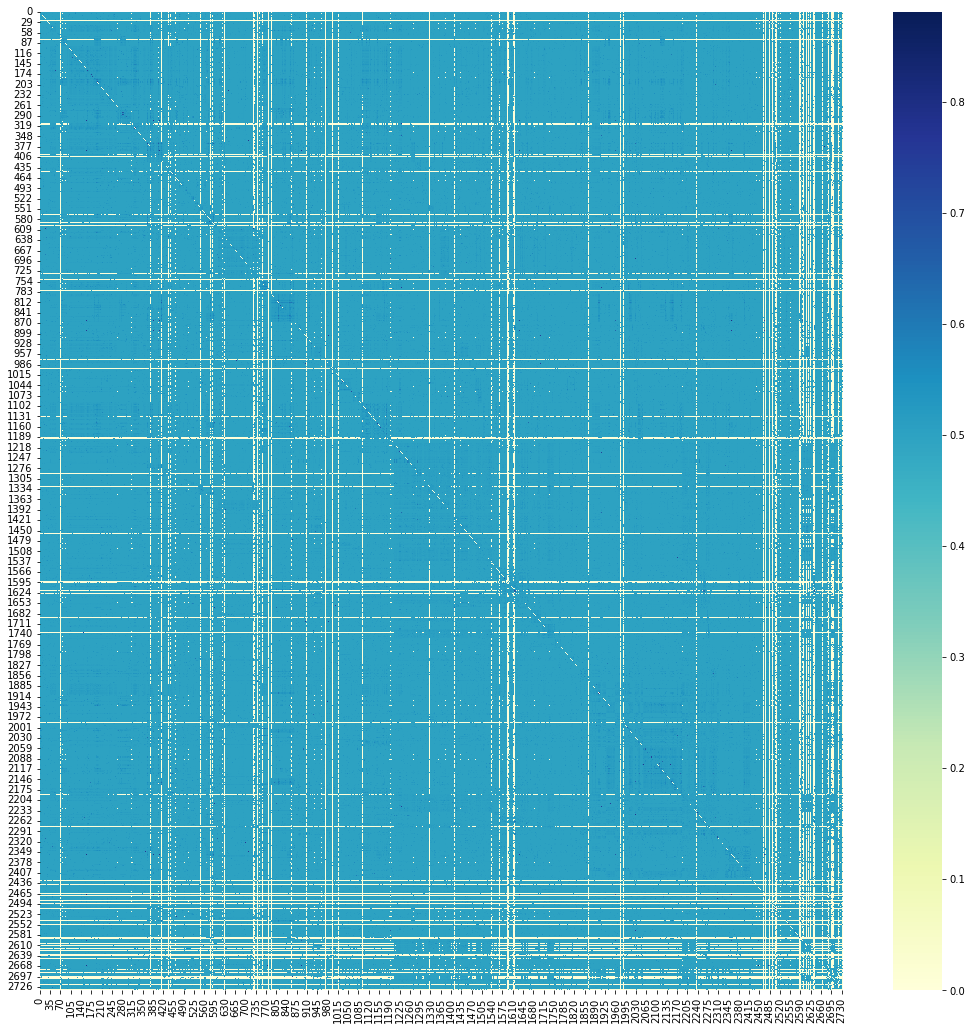

In [8]:
create_heatmap(np.loadtxt('../model_input_data/doc_doc_sim_tfidf.txt'))

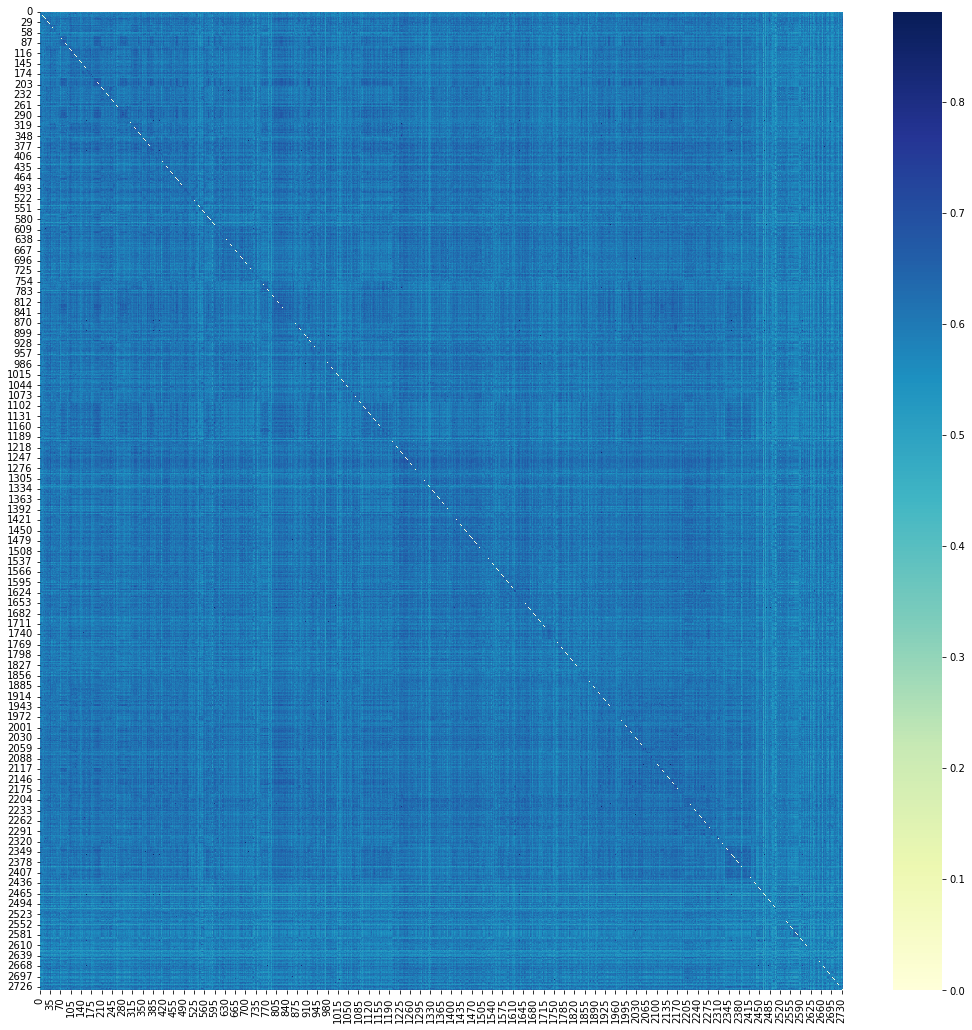

In [9]:
create_heatmap(np.loadtxt('../model_input_data/doc_doc_sim_mpnet.txt'))

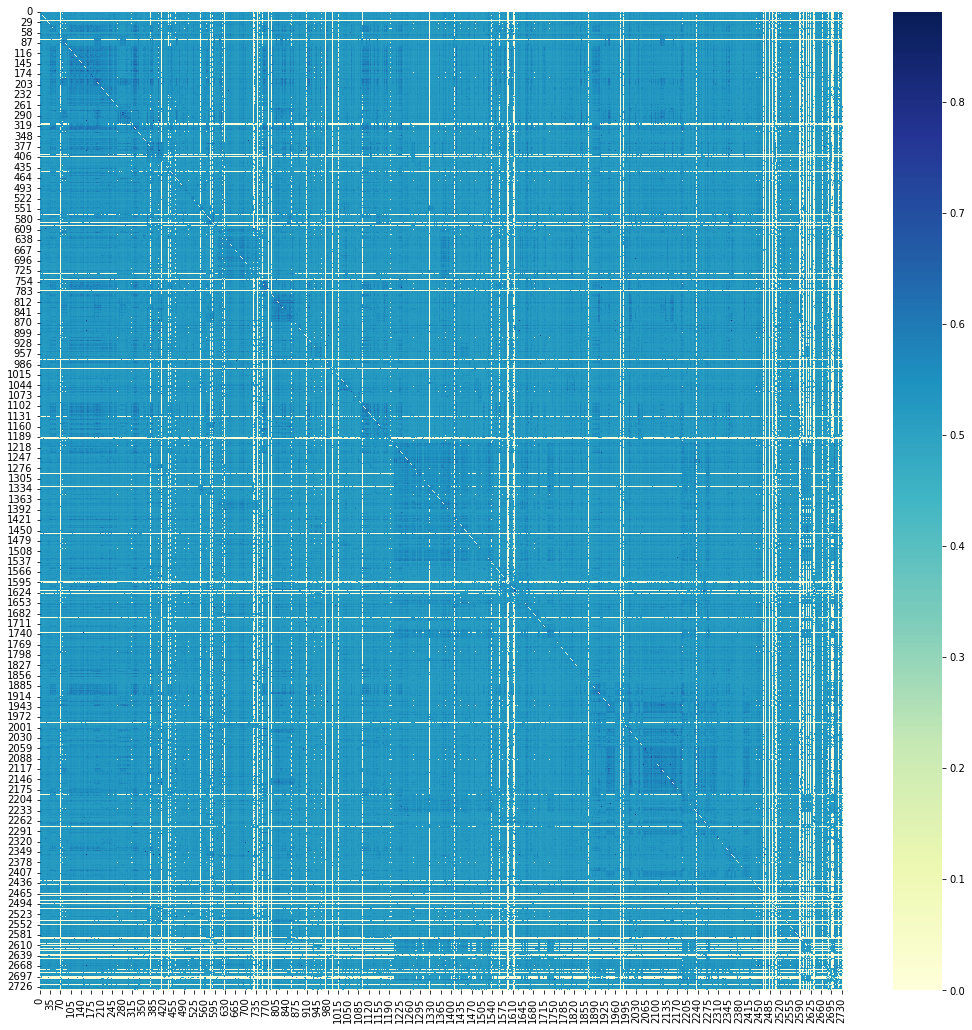

In [10]:
create_heatmap(np.loadtxt('../model_input_data/doc_doc_sim_count.txt'))

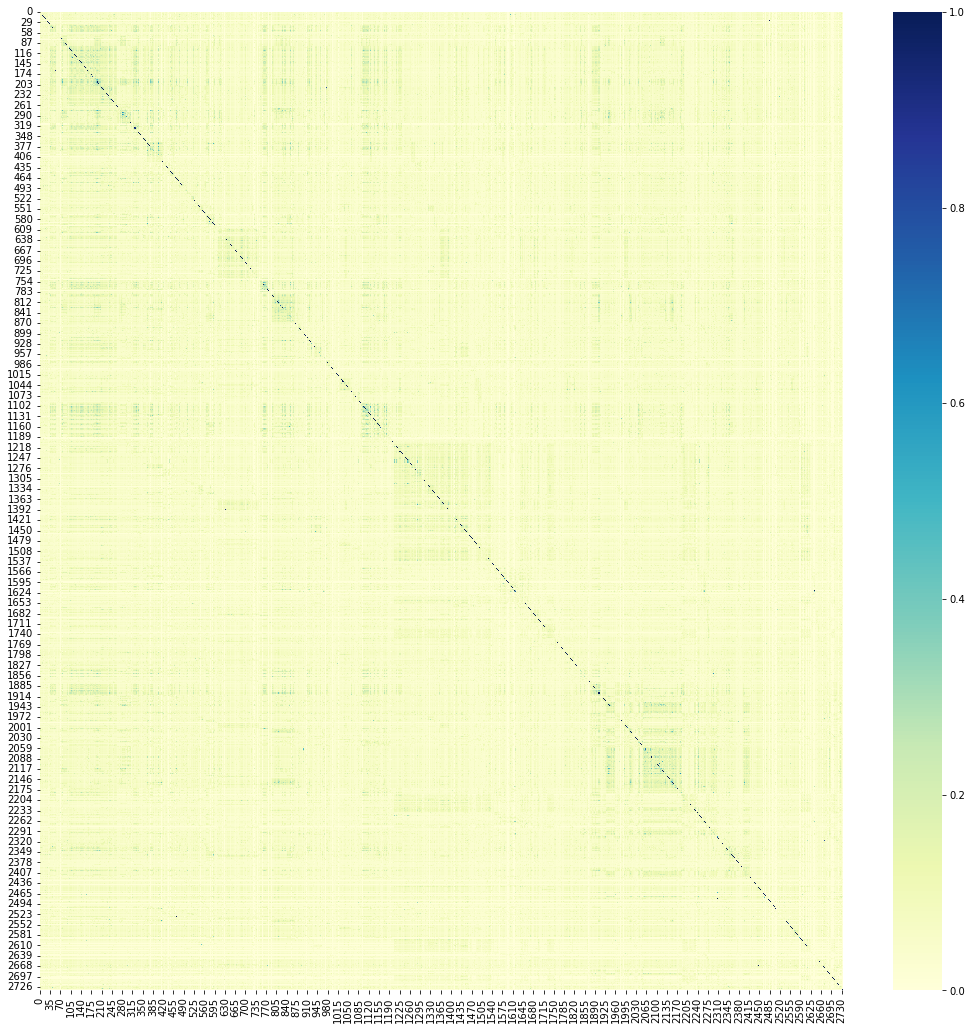

In [15]:
create_heatmap(np.loadtxt('../model_input_data/doc_doc_sim_jaccard.txt'))

#### Text Similarity

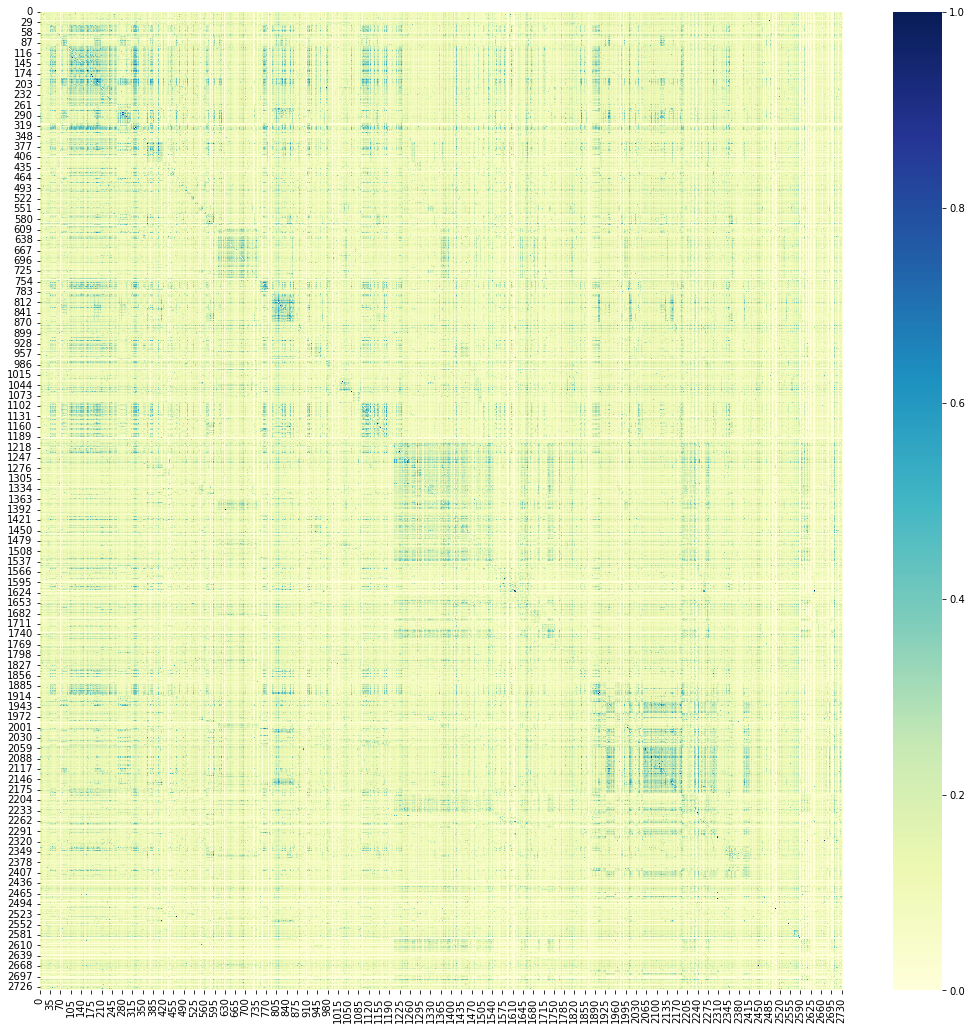

In [11]:
create_heatmap(np.loadtxt('../model_input_data/doc_doc_t_count.txt'))